In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import nibabel as nb
import CMR_HFpEF_Analysis.functions_collection as ff
import CMR_HFpEF_Analysis.Image_utils as util

2023-02-15 19:43:53.770282: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


load LAX image

(234, 234, 21) (1.3675214, 1.3675214, 7.0)


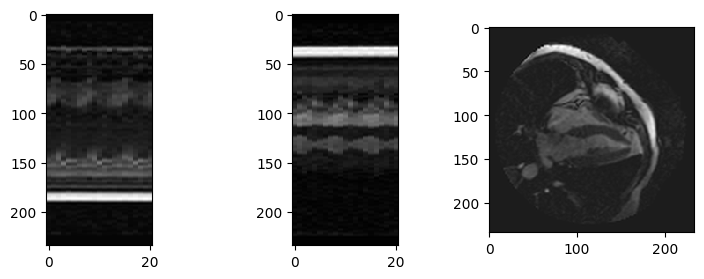

In [32]:
#filename = '/mnt/mount_zc_NAS/HFpEF/data/simulated_data_version2/155/ED/ds/data.nii.gz'
filename = '/mnt/mount_zc_NAS/HFpEF/data/Sunny_Brooks/LAX/nii-images/SC-HYP-38/img-nii-resampled/4CH_2.nii.gz'
img_file = nb.load(filename)
header = img_file.header
spacing = img_file.header.get_zooms()
affine = img_file.affine
img = img_file.get_fdata()
img= np.round(img)
img = img.astype(int)
print(img.shape,spacing)
plt.figure(figsize = (9,3))
plt.subplot(131); plt.imshow(img[img.shape[0]//2, ...], 'gray', aspect=spacing[1] / spacing[2])
plt.subplot(132); plt.imshow(img[:,img.shape[1]//2, :], 'gray', aspect=spacing[0] / spacing[2])
plt.subplot(133); plt.imshow(img[:,:,0], 'gray', aspect=spacing[0] / spacing[1])

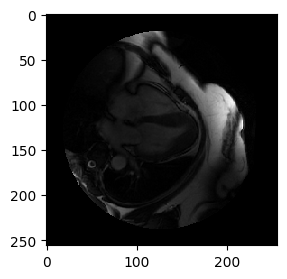

In [29]:
img_r = np.copy(img)
for z in range(0,img.shape[-1]):
    img_r[:,:,z] = img[:,:,z].T

# x
img_r = img_r[[img_r.shape[0] - i for i in range(1,img_r.shape[0]+1)],:,:]

# y
# img_r = img_r[:,[img_r.shape[1] - i for i in range(1,img_r.shape[1]+1)],:]

plt.figure(figsize = (3,3))
plt.imshow(img_r[:,:,0], 'gray')

In [30]:
save_folder = os.path.join(os.path.dirname(os.path.dirname(filename)), 'img-nii-rotated')
ff.make_folder([save_folder])
nb.save(nb.Nifti1Image(img_r, affine,header),os.path.join(save_folder, os.path.basename(filename)))